# sector 1

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s2.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

78891 after maybeTransit, 33.45447297893273% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
2,/tmp/tess/tesslcs_sector_2_104/tesslcs_tmag_10...,101932957,-12.12668,-2.98671,1364.01516,0.55190,0.00000,1680.86907,29.93271,0.00000,...,1360.01677,2459.57189,7.72737,13.97484,0.00113,0.00152,0.00086,0.00119,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
16,/tmp/tess/tesslcs_sector_2_104/tesslcs_tmag_11...,12968942,-11.91196,-10.26049,1372.89136,0.63190,0.00049,0.22883,29.98845,235.39235,...,139.34040,215.72872,6.96702,10.78644,0.00149,0.00188,0.00096,0.00156,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
18,/tmp/tess/tesslcs_sector_2_104/tesslcs_tmag_11...,204390025,-9.71659,-2.31013,1358.22496,1.00060,0.00255,0.50559,2.52421,1.82366,...,1234.43315,1223.58696,4.64073,4.59995,0.00148,0.00148,0.00115,0.00114,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
20,/tmp/tess/tesslcs_sector_2_104/tesslcs_tmag_10...,33911697,-4.41429,-3.81906,1364.03720,1.00578,0.00024,0.39136,3.83525,5.35160,...,95.46236,94.97759,0.74580,0.74201,0.00033,0.00033,0.00026,0.00026,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
21,/tmp/tess/tesslcs_sector_2_104/tesslcs_tmag_10...,142016433,-12.21031,-3.32091,1374.15686,0.99997,0.00227,0.26176,-0.14362,39.65698,...,2710.73639,2710.66443,13.15891,13.15857,0.00119,0.00119,0.00077,0.00077,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

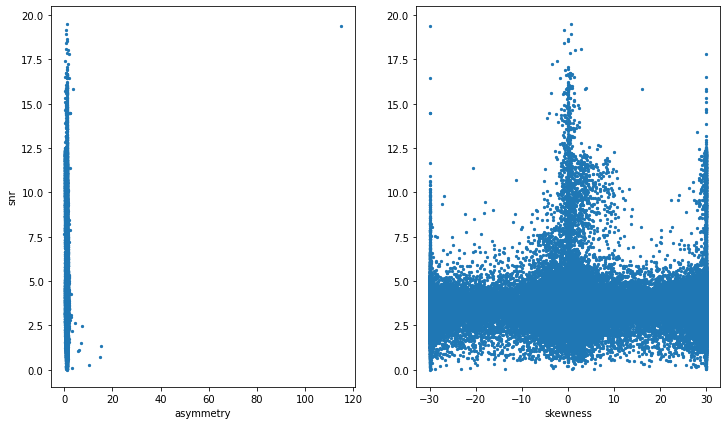

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

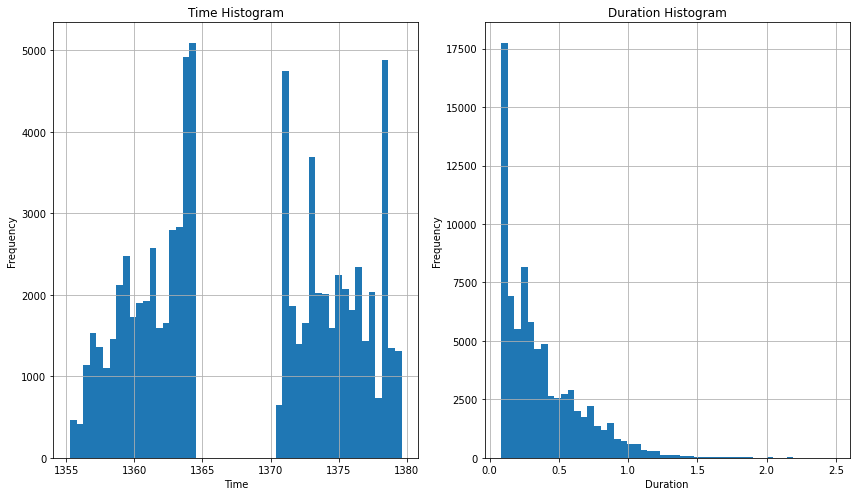

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

6017

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

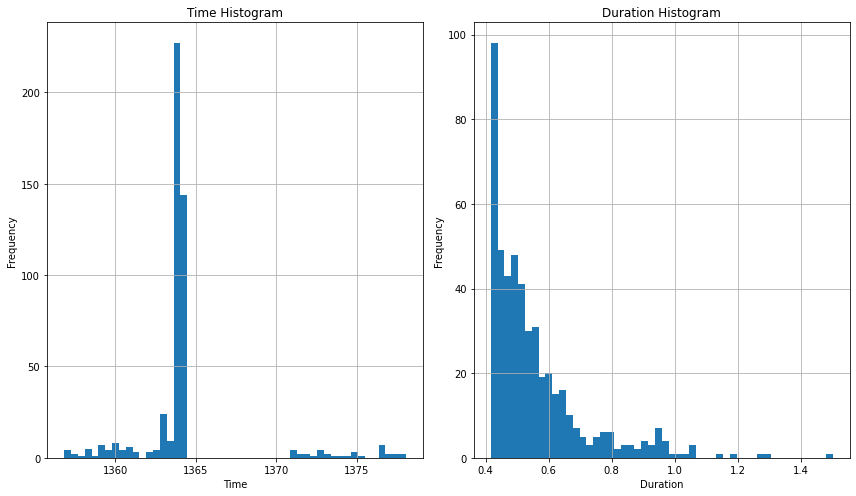

In [12]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

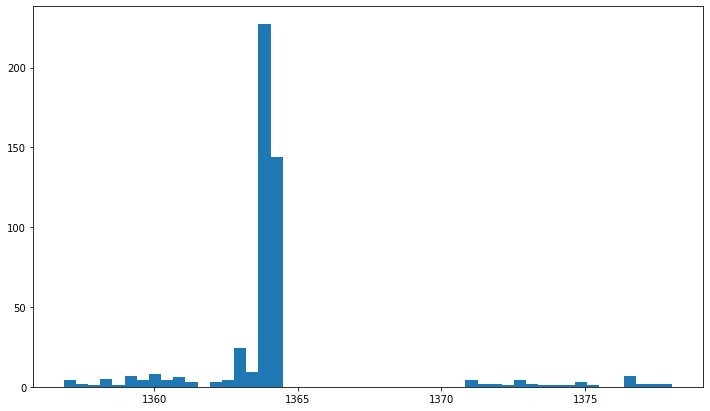

In [14]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [15]:
hist_values

array([  4.,   2.,   1.,   5.,   1.,   7.,   4.,   8.,   4.,   6.,   3.,
         0.,   3.,   4.,  24.,   9., 227., 144.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         4.,   2.,   2.,   1.,   4.,   2.,   1.,   1.,   1.,   3.,   1.,
         0.,   0.,   7.,   2.,   2.,   2.])

In [18]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [19]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1363.6292704 start of bin
1364.0530398 end of bin
227.0 number of lcs


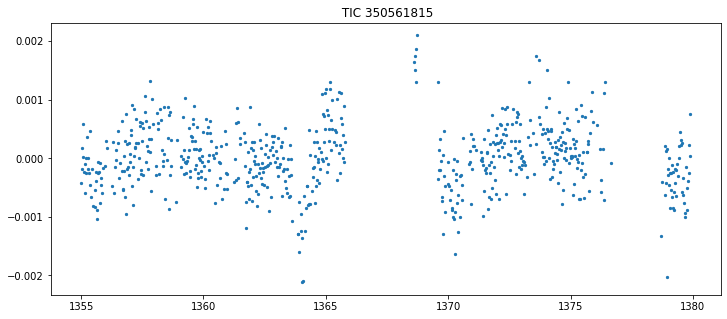

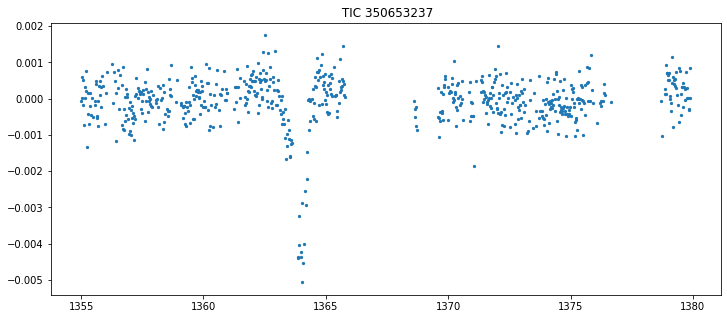

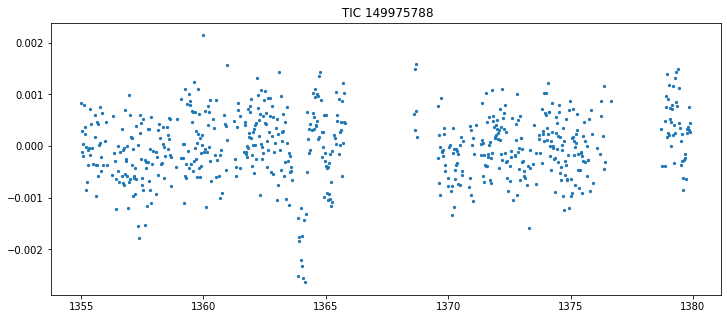

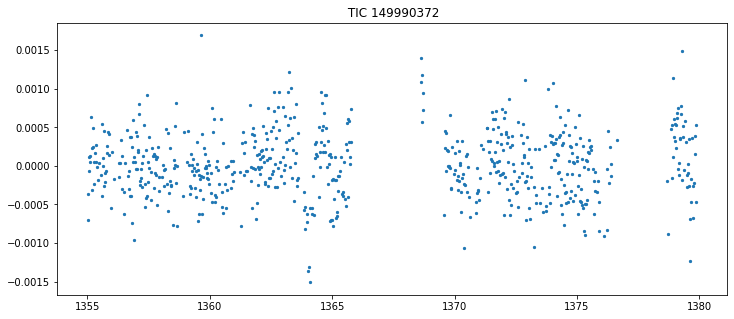

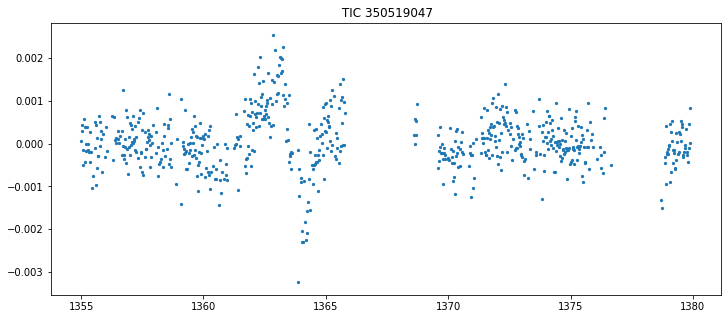

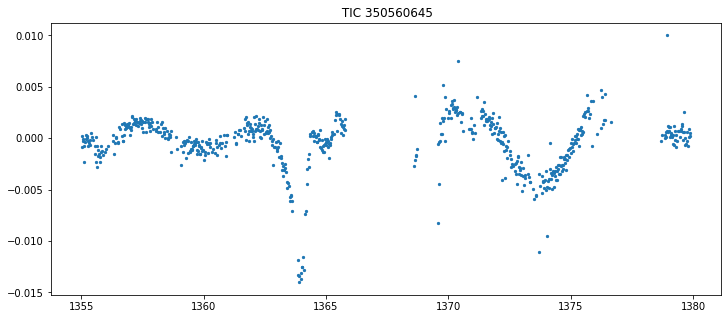

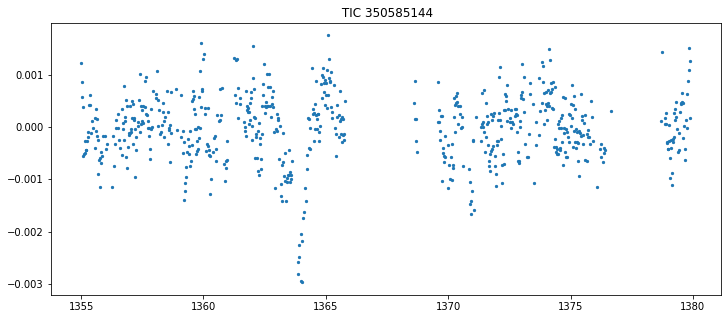

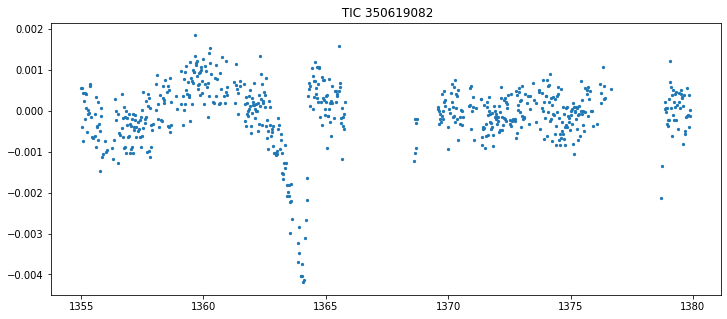

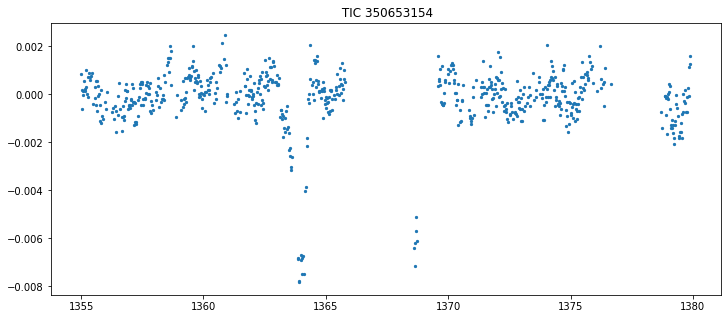

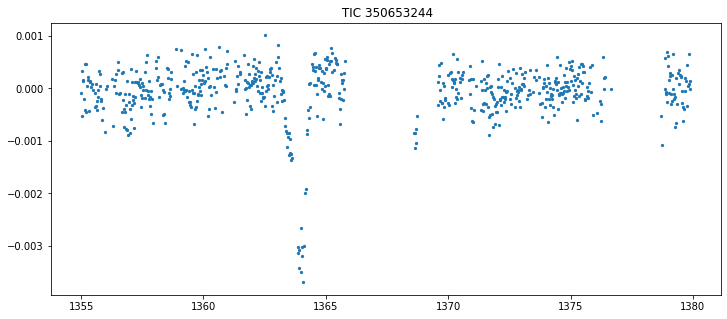

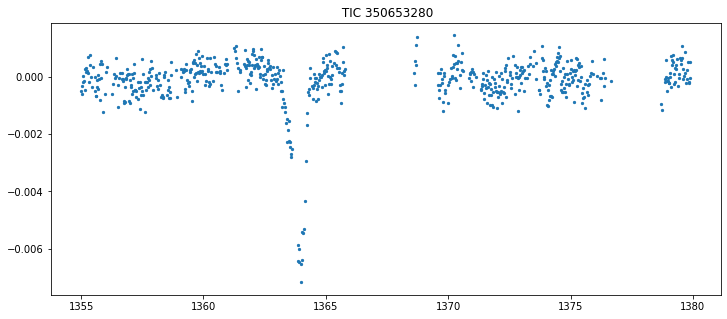

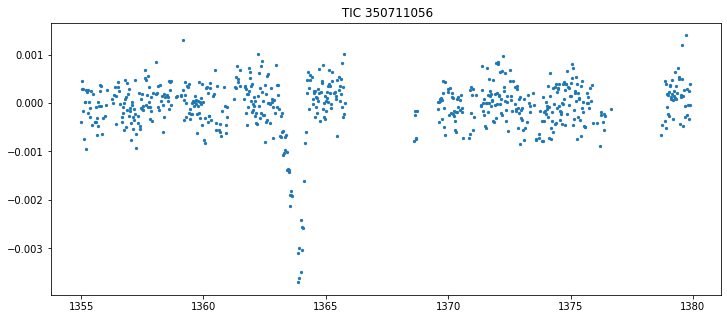

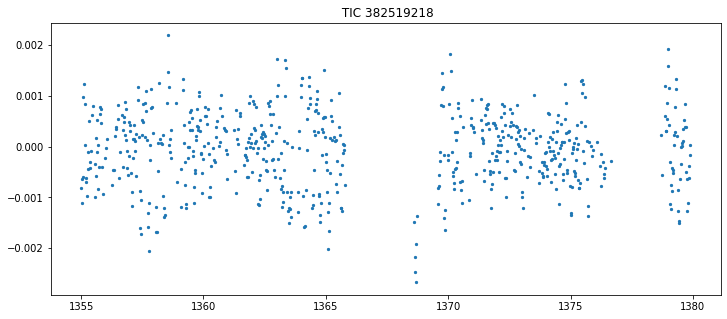

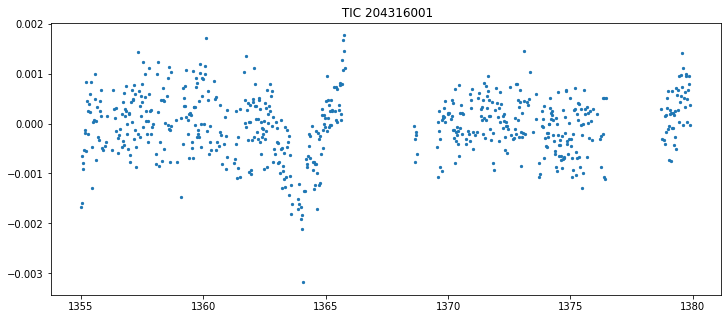

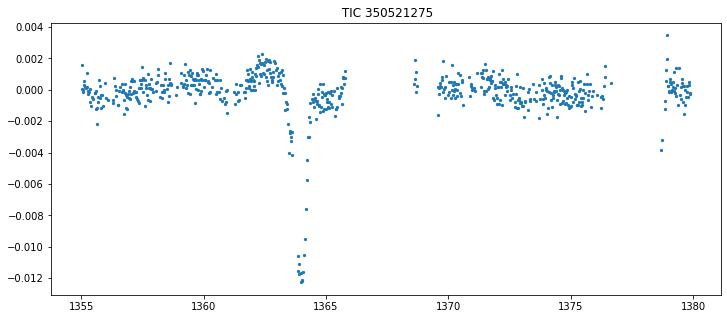

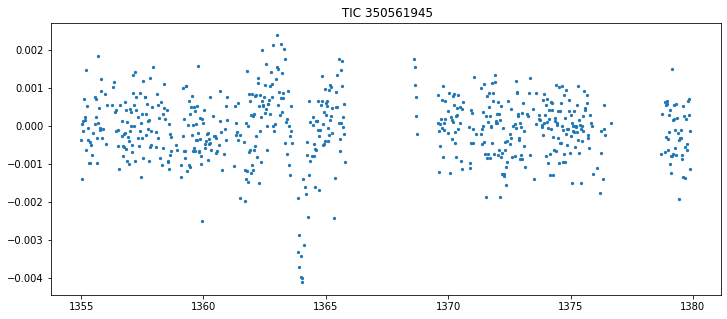

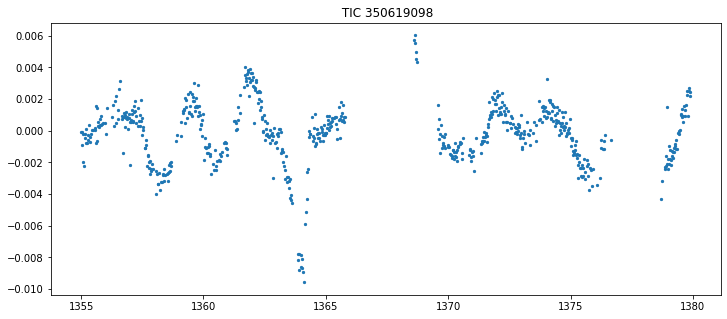

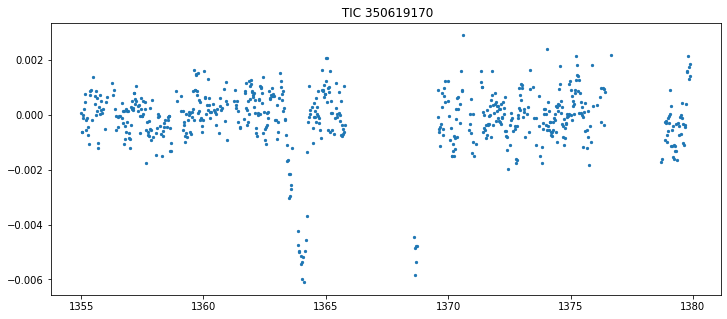

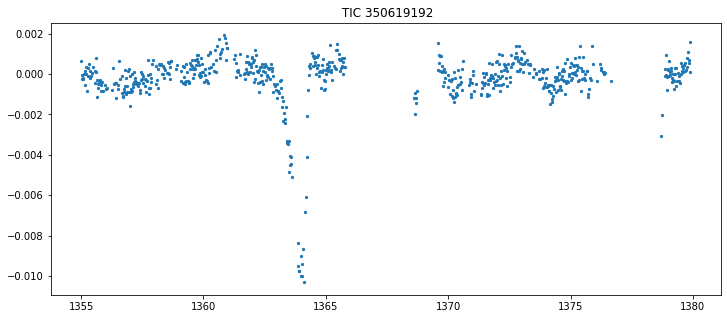

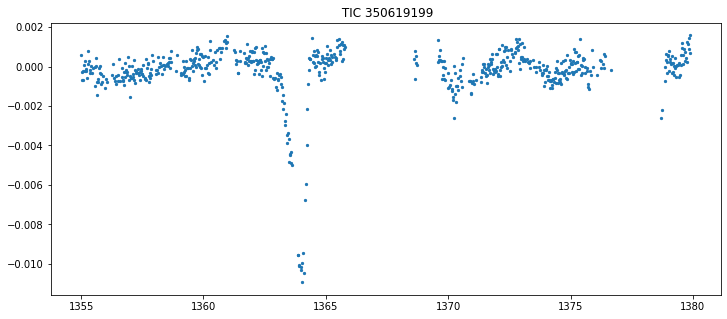

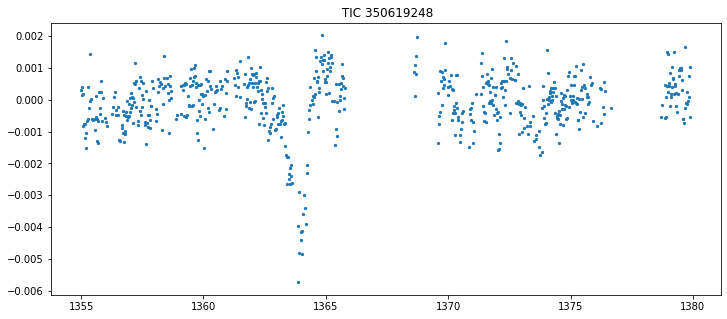

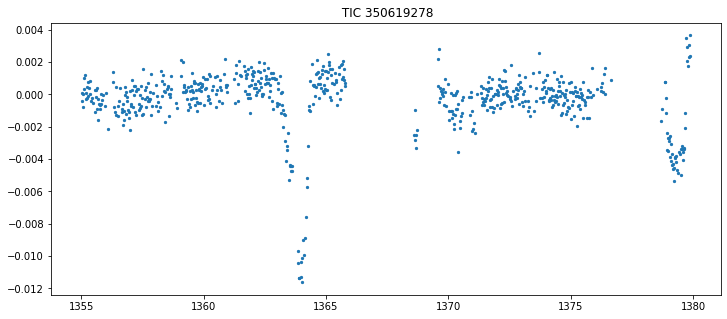

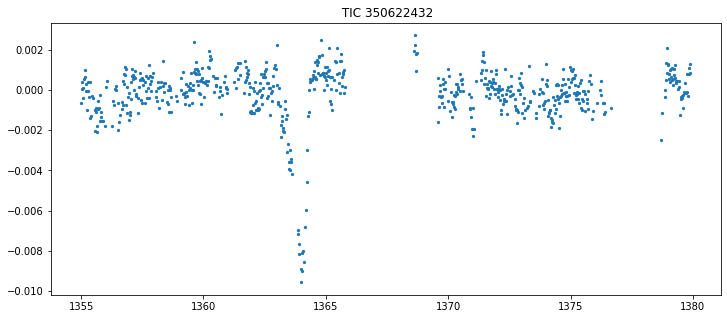

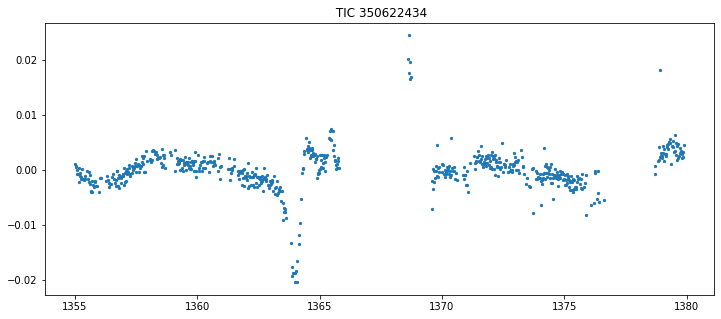

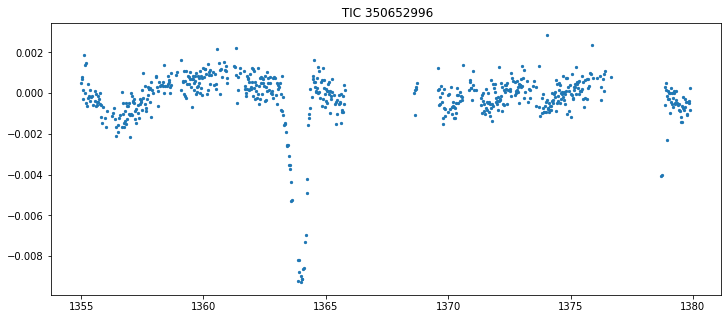

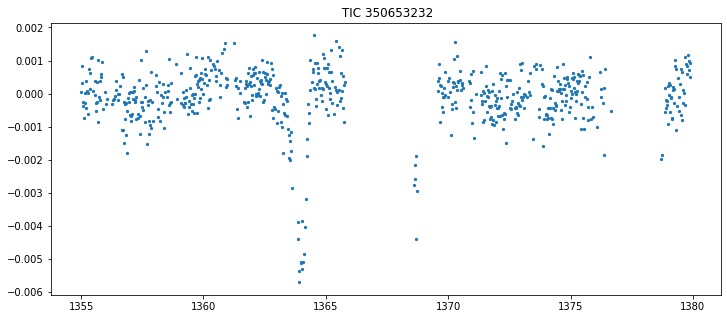

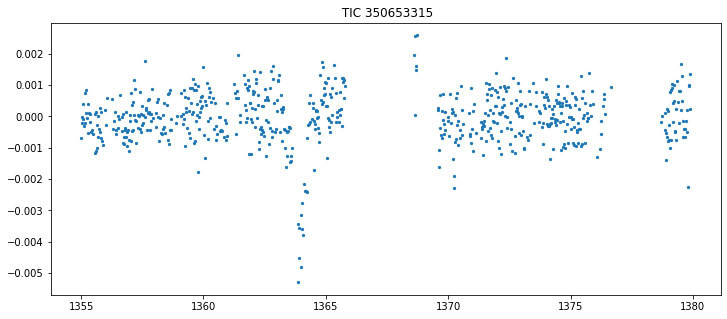

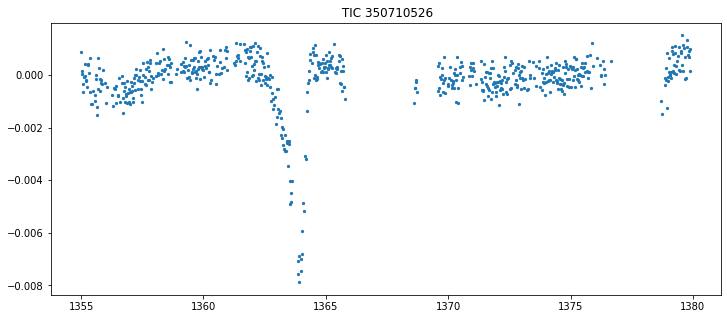

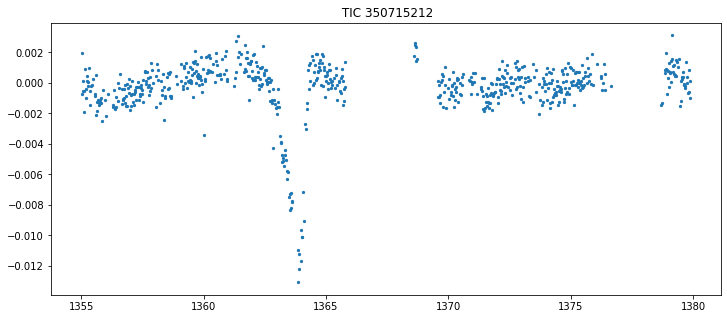

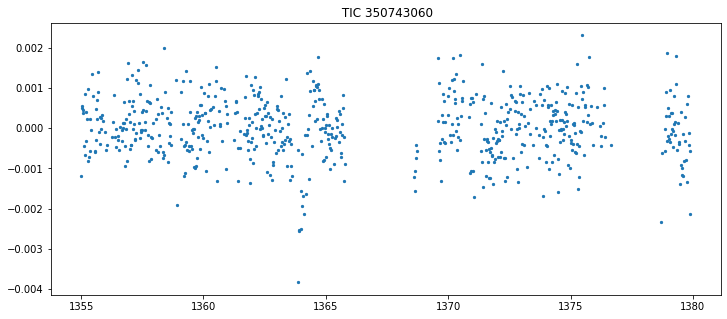

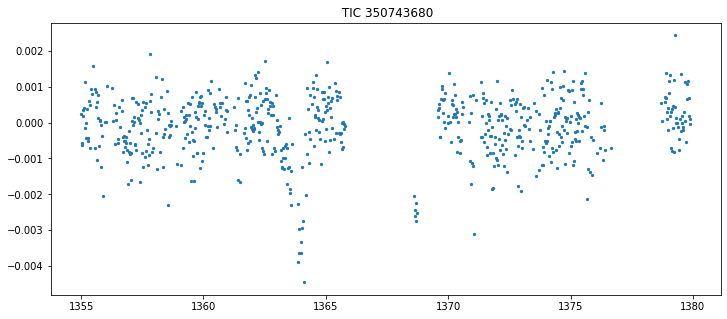

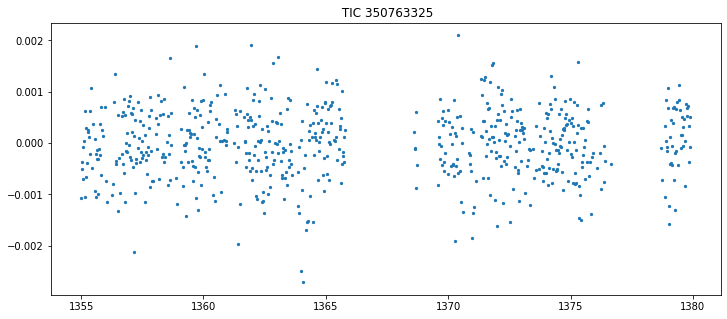

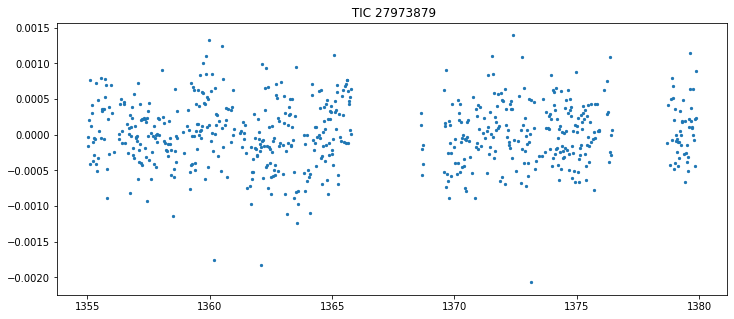

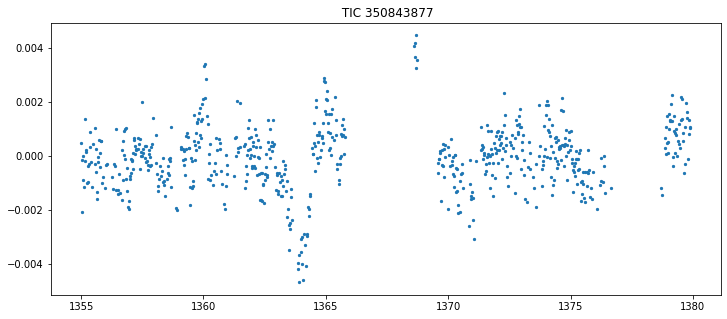

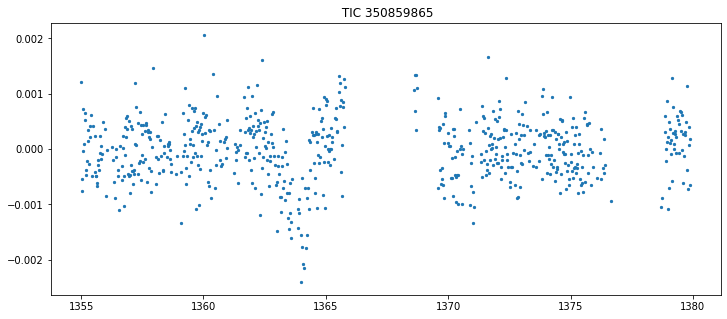

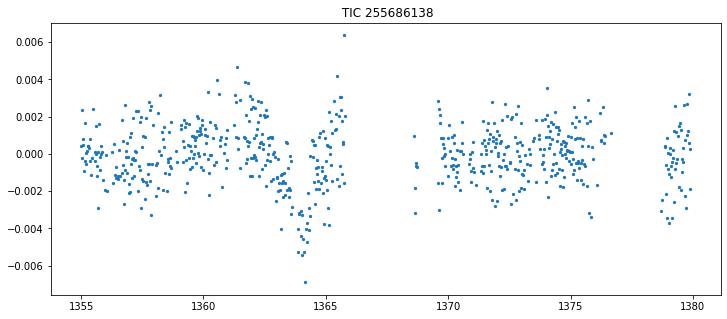

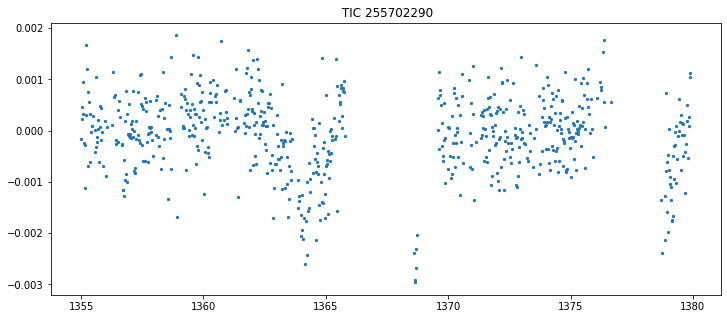

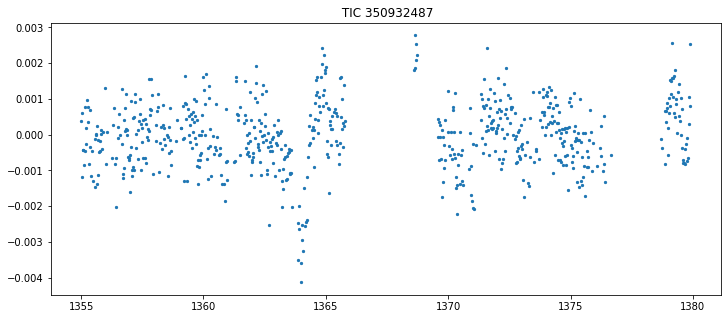

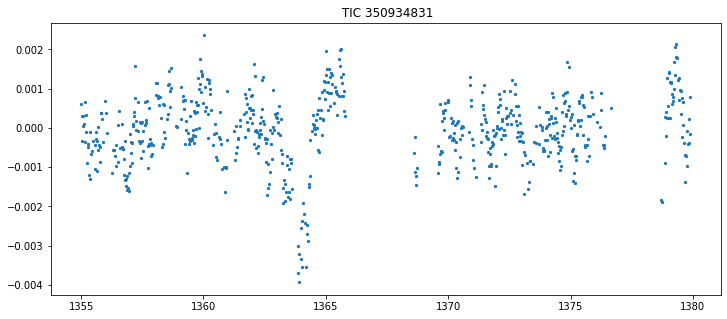

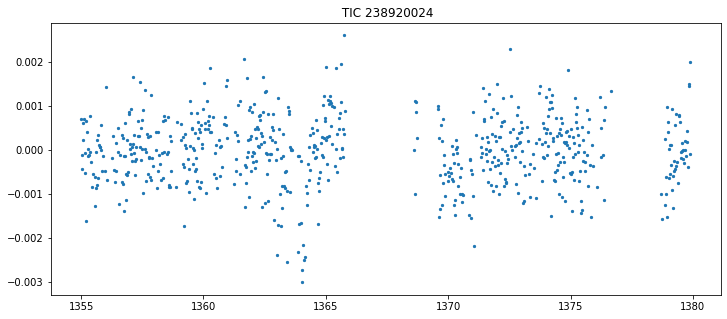

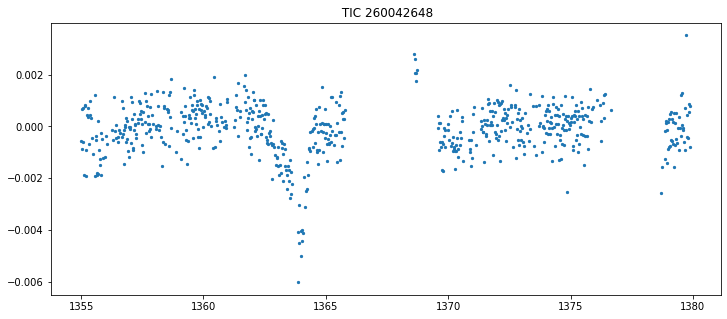

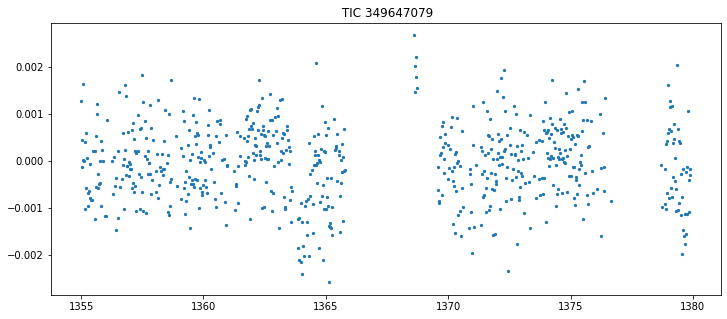

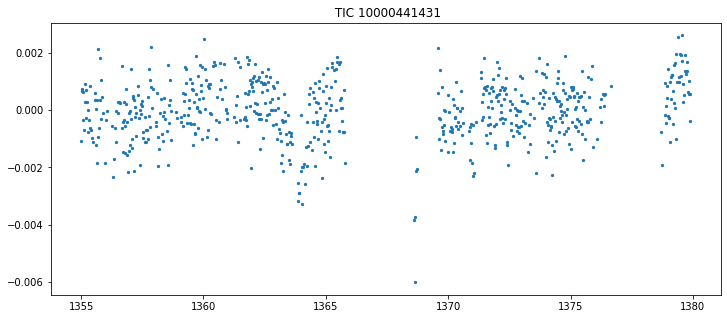

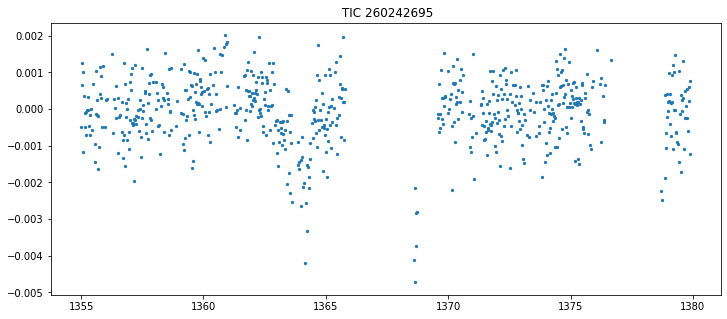

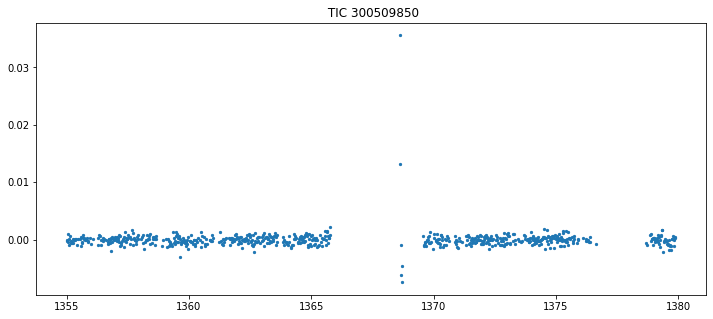

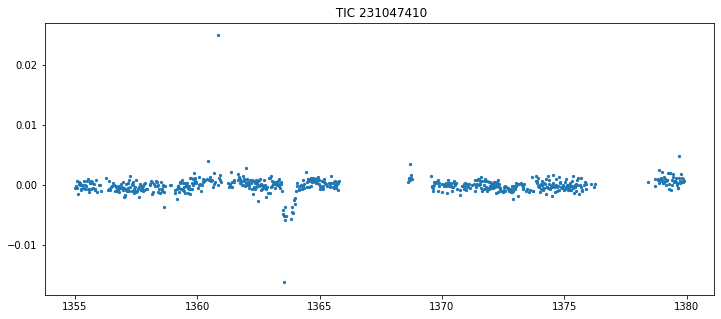

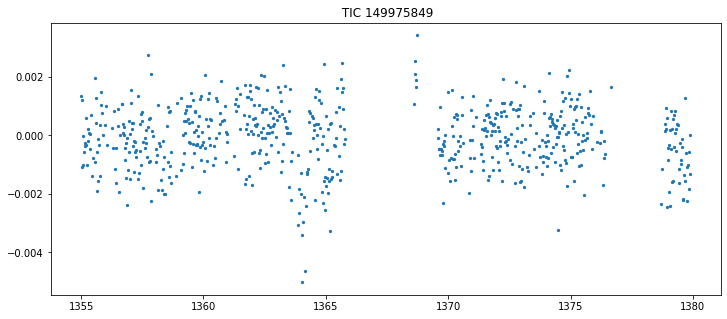

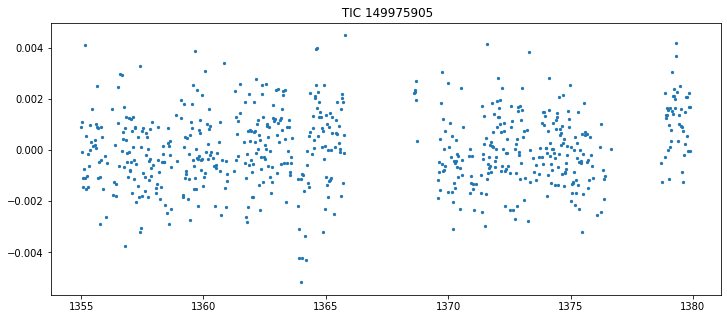

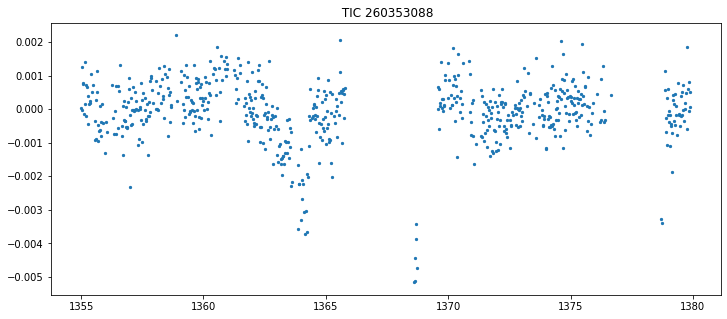

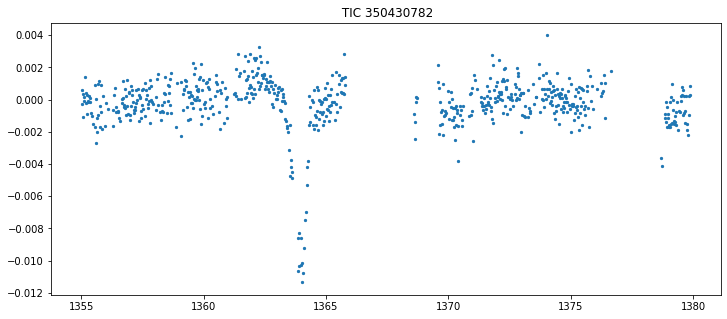

In [20]:
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()